In [78]:
import numpy as np
import matplotlib.pyplot as plt


def batch(X, Y, batchsize=20):
    n = Y.shape[0]
    idx = np.random.choice(np.arange(n), size=batchsize, replace=False)
    X_batch = X[idx, :]
    Y_batch = Y[idx, :]
    return X_batch, Y_batch


def regularized_MSE(X, Y, theta, w, alpha=0.2):
    n = Y.shape[0]
    return (1/(2*n))*((np.dot((np.dot(X, theta) - Y).transpose(), np.dot(X, theta) - Y)) + alpha*np.dot(w.T, w))


def unregularized_MSE(X, Y, theta):
    n = Y.shape[0]
    return (1/(2*n))*(np.dot((np.dot(X, theta) - Y).transpose(), np.dot(X, theta) - Y))


def SGD(X, Y, learning_rate=0.01, epochs=200, batchsize=64, alpha=0.2):

    n, m = X.shape
    _, p = Y.shape

    w = np.random.randn(m, p)
    b = np.random.randn(p, p)
    
    X = np.append(X, np.ones((n, p)), axis=1)

    n, m_new = X.shape

    COST= np.zeros(epochs)
    thetas = np.zeros((m_new, p, epochs))

    theta = np.append(w, b, axis=0)

    for i in range(epochs):
        thetas[:, :, i] = theta

        X_batch, Y_batch = batch(X, Y, batchsize)
        Y_pred = np.dot(X_batch, theta)

        grad_desc = (1/n)*(np.dot(X_batch.T, (Y_pred - Y_batch)))
        theta = theta - learning_rate * grad_desc - 2*alpha*np.append(w, np.zeros((p, p)), axis=0)

        # The optimized weights
        w = theta[:m, :p]

        COST[i] = unregularized_MSE(X_batch, Y_batch, theta)

    return theta, thetas, COST


In [83]:

X_tr = np.reshape(np.load("age_regression_Xtr.npy"), (-1, 48*48))
# ytr = np.load("age_regression_ytr.npy")
n = X_tr.shape[0]

ytr = np.load("age_regression_ytr.npy")
ytr = ytr.reshape(-1, 1)

idx = np.arange(n)
validation_set = round(0.2*n)
idx_val = np.random.choice(idx, size=validation_set, replace=False)
X_val = X_tr[idx_val, :]
yval = ytr[idx_val, :]

n_val = X_val.shape[0]
X_val = np.append(X_val, np.ones((n_val, 1)), axis=1)

idx_tr = np.setxor1d(idx, idx_val)
X_tr = X_tr[idx_tr, :]
ytr = ytr[idx_tr, :]
print(X_tr.shape)

LR = [0.001, 0.005, 0.01, 0.05]
EPOCHS = [50, 100, 200, 400]
BATCHSIZE = [256, 512, 1024, 2048]
ALPHA = [0.001, 0.002, 0.005, 0.01]
lr = epochs = bs = alpha = 0
cost = 10000
for lr_ in LR:
    for epochs_ in EPOCHS:
        for bs_ in BATCHSIZE:
            for alpha_ in ALPHA:
                theta, thetas, COST = SGD(X_tr, ytr, learning_rate=lr_, epochs=epochs_, batchsize=bs_, alpha=alpha_)
                MSE = unregularized_MSE(X_val, yval, theta)
                print("MSE: ", MSE)

                if MSE < cost:
                    lr = lr_
                    epochs = epochs_
                    bs = bs_
                    alpha = alpha_
                    cost = MSE
print("Learning rate: ", lr)
print("Number of epochs: ", epochs)
print("batche size: ", bs)
print("Alpha: ", alpha)





(4000, 2304)
MSE:  [[191.29766711]]
MSE:  [[175.1128619]]
MSE:  [[190.28214425]]
MSE:  [[238.02479072]]
MSE:  [[161.25501203]]
MSE:  [[157.88726485]]
MSE:  [[154.92306348]]
MSE:  [[166.71625564]]
MSE:  [[160.32540427]]
MSE:  [[152.01300728]]
MSE:  [[146.29219659]]
MSE:  [[141.86963198]]
MSE:  [[157.97914388]]
MSE:  [[135.91253811]]
MSE:  [[146.64658511]]
MSE:  [[135.09700149]]
MSE:  [[171.03222214]]
MSE:  [[144.987178]]
MSE:  [[168.36726078]]
MSE:  [[201.29743152]]
MSE:  [[160.2385705]]
MSE:  [[150.68018166]]
MSE:  [[148.95343838]]
MSE:  [[161.09203619]]
MSE:  [[158.32583517]]
MSE:  [[141.11024072]]
MSE:  [[137.98410444]]
MSE:  [[142.14550227]]
MSE:  [[143.72058251]]
MSE:  [[133.2792699]]
MSE:  [[131.08674282]]
MSE:  [[132.08273262]]
MSE:  [[137.47686814]]
MSE:  [[140.41762324]]
MSE:  [[157.79588936]]
MSE:  [[208.45027197]]
MSE:  [[133.70836383]]
MSE:  [[142.4067524]]
MSE:  [[137.91648891]]
MSE:  [[164.59942682]]
MSE:  [[131.32545545]]
MSE:  [[137.18205786]]
MSE:  [[133.49755588]]
MSE:

/var/folders/9f/bxhznjb11mn2d81xtx4rpdh00000gn/T/ipykernel_15181/3317948500.py:48: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * grad_desc - 2*alpha*np.append(w, np.zeros((p, p)), axis=0)


MSE:  [[nan]]
MSE:  [[nan]]
MSE:  [[nan]]
MSE:  [[nan]]
MSE:  [[nan]]
Learning rate:  0.005
Number of epochs:  400
batche size:  2048
Alpha:  0.002


5000


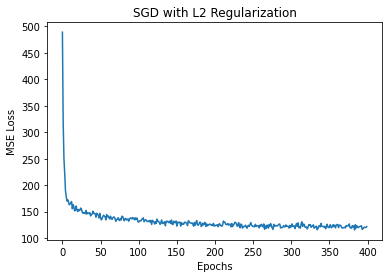

MSE on test data:  124.29241523686075
Tuned Hyperparameters: 
learning rate:  0.005 , Epochs:  400 , Batchsize:  2048 , alpha:  0.002


In [84]:
theta, THETAs, COST = SGD(X_tr, ytr, learning_rate=lr, epochs=epochs, batchsize=bs, alpha=alpha)
print(n)
plt.plot(COST)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('SGD with L2 Regularization')
plt.show()

X_te = np.load("age_regression_Xte.npy")
n = X_te.shape[0]
X_te = X_te.reshape((n,-1))

X_te = np.append(X_te, np.ones((n,1)), axis=1)

yte = np.load("age_regression_yte.npy")
yte = yte.reshape(-1,1)
MSE_test = unregularized_MSE(X_te, yte, theta)
print('MSE on test data: ', MSE_test[0,0])
print('Tuned Hyperparameters: ')
print('learning rate: ', lr, ', Epochs: ', epochs, ', Batchsize: ', bs, ', alpha: ', alpha)